In [85]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable


In [86]:
import pandas as pd

df = pd.read_csv(
    '경찰청_범죄 발생 지역별 통계_20231231.csv',
    encoding='cp949'
)
df.head()


,범죄대분류,범죄중분류,서울종로구,서울중구,서울용산구,서울성동구,서울광진구,서울동대문구,서울중랑구,서울성북구,...,외국러시아,외국튀르키예,외국중국,외국일본,외국필리핀,외국베트남,외국태국,외국말레이시아,외국인도네시아,외국기타국가
0,강력범죄,살인기수,2,0,1,1,0,2,4,1,...,0,0,0,0,1,0,0,0,0,0
1,강력범죄,살인미수등,1,3,2,1,2,3,2,0,...,1,0,1,0,0,0,0,0,0,1
2,강력범죄,강도,5,6,3,2,5,4,2,1,...,0,0,0,0,3,0,0,0,0,0
3,강력범죄,강간,25,30,45,22,42,36,40,25,...,0,0,3,1,3,1,1,1,0,3
4,강력범죄,유사강간,10,4,4,6,9,5,9,7,...,0,0,0,0,1,0,0,1,0,1


In [87]:



df_pop = pd.read_csv(
    '202510_202510_주민등록인구및세대현황_월간.csv',
    encoding='cp949'
)
df_pop.head()


,행정구역,2025년10월_총인구수,2025년10월_세대수,2025년10월_세대당 인구,2025년10월_남자 인구수,2025년10월_여자 인구수,2025년10월_남여 비율
0,서울특별시 (1100000000),"9,313,532","4,503,798",2.07,"4,489,067","4,824,465",0.93
1,서울특별시 종로구 (1111000000),"137,449","72,409",1.90,"65,925","71,524",0.92
2,서울특별시 중구 (1114000000),"118,331","64,120",1.85,"56,829","61,502",0.92
3,서울특별시 용산구 (1117000000),"202,507","103,214",1.96,"96,459","106,048",0.91
4,서울특별시 성동구 (1120000000),"274,424","133,109",2.06,"132,555","141,869",0.93


In [88]:
df = df.loc[:, ~df.columns.str.startswith('외국')]


In [89]:

df.head()


,범죄대분류,범죄중분류,서울종로구,서울중구,서울용산구,서울성동구,서울광진구,서울동대문구,서울중랑구,서울성북구,...,경남창녕군,경남고성군,경남하동군,경남합천군,경남남해군,경남함양군,경남산청군,경남의령군,제주서귀포시,제주제주시
0,강력범죄,살인기수,2,0,1,1,0,2,4,1,...,0,0,0,0,0,0,0,0,4,1
1,강력범죄,살인미수등,1,3,2,1,2,3,2,0,...,1,2,2,0,0,0,1,0,3,2
2,강력범죄,강도,5,6,3,2,5,4,2,1,...,1,0,2,1,1,0,0,1,2,14
3,강력범죄,강간,25,30,45,22,42,36,40,25,...,4,2,2,1,2,1,0,0,31,81
4,강력범죄,유사강간,10,4,4,6,9,5,9,7,...,1,0,0,0,0,0,0,1,2,10


In [90]:
# 1. 지표/지역 컬럼 구분
id_cols = ['범죄대분류', '범죄중분류']
value_cols = [c for c in df.columns if c not in id_cols]

# 2. 범죄대분류별(지역별 합계) 행 만들기
대분류별_합계 = (
    df.groupby('범죄대분류', as_index=False)[value_cols]
      .sum()
)
대분류별_합계['범죄중분류'] = '소계'  # 소계 표시

# 3. 전체 범죄(지역별 합계) 행 만들기
전체_합계 = df[value_cols].sum().to_frame().T
전체_합계['범죄대분류'] = '전체'
전체_합계['범죄중분류'] = '전체'

# 4. 컬럼 순서 맞추고 기존 df에 붙이기
대분류별_합계 = 대분류별_합계[df.columns]
전체_합계 = 전체_합계[df.columns]

df = pd.concat([df, 대분류별_합계, 전체_합계], ignore_index=True)


In [91]:
id_cols = ['범죄대분류', '범죄중분류']
seoul_cols = [c for c in df.columns if c.startswith('서울')]
df = df[id_cols + seoul_cols]
df.head()

,범죄대분류,범죄중분류,서울종로구,서울중구,서울용산구,서울성동구,서울광진구,서울동대문구,서울중랑구,서울성북구,...,서울강서구,서울구로구,서울금천구,서울영등포구,서울동작구,서울관악구,서울서초구,서울강남구,서울송파구,서울강동구
0,강력범죄,살인기수,2,0,1,1,0,2,4,1,...,0,0,1,6,0,3,1,2,2,1
1,강력범죄,살인미수등,1,3,2,1,2,3,2,0,...,1,12,3,6,3,14,6,12,6,3
2,강력범죄,강도,5,6,3,2,5,4,2,1,...,6,7,5,9,3,10,9,19,9,5
3,강력범죄,강간,25,30,45,22,42,36,40,25,...,77,34,25,51,18,78,55,181,64,34
4,강력범죄,유사강간,10,4,4,6,9,5,9,7,...,12,7,5,12,2,20,9,38,7,6


In [92]:
import numpy as np

# 1. df_pop: 총인구 숫자형으로 변환
df_pop['2025년10월_총인구수'] = (
    df_pop['2025년10월_총인구수']
    .astype(str).str.replace(',', '', regex=False)
    .astype(int)
)

# 2. 서울 자치구만 추출 + 자치구 이름 뽑기 (종로구, 중구, ...)
seoul_pop = df_pop[df_pop['행정구역'].str.startswith('서울특별시 ')].copy()
seoul_pop['자치구'] = seoul_pop['행정구역'].str.extract(r'서울특별시\s+(.+?구)')[0]

# 3. df에서 서울 구 컬럼들 찾기
id_cols = ['범죄대분류', '범죄중분류']
seoul_cols = [c for c in df.columns if c.startswith('서울')]

# 4. 컬럼명(서울종로구 → 종로구)과 인구 매핑
col_to_gu = [c.replace('서울', '') for c in seoul_cols]  # ['종로구', '중구', ...]
pop_map = seoul_pop.set_index('자치구')['2025년10월_총인구수']

# 5. 각 구 인구 배열 만들고 나누기
pop_arr = np.array([pop_map[gu] for gu in col_to_gu])  # 구 순서에 맞춘 인구
df[seoul_cols] = df[seoul_cols].div(pop_arr, axis=1)   # 1인당 범죄수

# 만약 10만 명당 범죄수로 보고 싶으면:
# df[seoul_cols] = df[seoul_cols].div(pop_arr, axis=1) * 100_000


In [93]:
df.head()

,범죄대분류,범죄중분류,서울종로구,서울중구,서울용산구,서울성동구,서울광진구,서울동대문구,서울중랑구,서울성북구,...,서울강서구,서울구로구,서울금천구,서울영등포구,서울동작구,서울관악구,서울서초구,서울강남구,서울송파구,서울강동구
0,강력범죄,살인기수,0.000015,0.000000,0.000005,0.000004,0.000000,0.000006,0.000011,0.000002,...,0.000000,0.000000,0.000004,0.000016,0.000000,0.000006,0.000002,0.000004,0.000003,0.000002
1,강력범죄,살인미수등,0.000007,0.000025,0.000010,0.000004,0.000006,0.000009,0.000005,0.000000,...,0.000002,0.000031,0.000013,0.000016,0.000008,0.000029,0.000015,0.000022,0.000009,0.000006
2,강력범죄,강도,0.000036,0.000051,0.000015,0.000007,0.000015,0.000012,0.000005,0.000002,...,0.000011,0.000018,0.000022,0.000024,0.000008,0.000021,0.000022,0.000034,0.000014,0.000010
3,강력범죄,강간,0.000182,0.000254,0.000222,0.000080,0.000127,0.000105,0.000106,0.000059,...,0.000140,0.000088,0.000112,0.000137,0.000048,0.000163,0.000133,0.000325,0.000099,0.000068
4,강력범죄,유사강간,0.000073,0.000034,0.000020,0.000022,0.000027,0.000015,0.000024,0.000017,...,0.000022,0.000018,0.000022,0.000032,0.000005,0.000042,0.000022,0.000068,0.000011,0.000012


In [94]:
df_money = pd.read_csv('서울시 상권분석서비스(소득소비-자치구).csv',
    encoding='cp949')
df_money.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20242,11215,광진구,3192971,7,100541241000,22634699000,3375381000,1864827000,15005146000,5961023000,3393363000,4281862000,6687173000,5054612000,32283155000
1,20242,11500,강서구,3160623,7,231352477000,34067640000,6533371000,2276283000,32773565000,33678827000,6986997000,4639547000,55668619000,16818036000,37909592000
2,20242,11740,강동구,3292857,7,157864735000,23331462000,2428563000,1590537000,21974063000,3736967000,6822469000,2666873000,66151709000,3909040000,25253052000
3,20243,11260,중랑구,2598785,6,24488372000,7415487000,384896000,486318000,4031113000,1791594000,944118000,998291000,1317535000,892071000,6226949000
4,20243,11470,양천구,3796034,8,40012838000,9217440000,398730000,389703000,8155027000,2268938000,5841107000,732643000,3974345000,1369768000,7665137000


[칼럼 비교 요약]
- df 컬럼 수: 27
- df_money 컬럼 수: 16
- 공통 컬럼 수: 0 -> []
- df의 서울 구 컬럼 수: 25 -> ['서울종로구', '서울중구', '서울용산구', '서울성동구', '서울광진구', '서울동대문구', '서울중랑구', '서울성북구', '서울강북구', '서울도봉구'] ...
- df_money 자치구 추정 컬럼: 행정동_코드_명
- df_money 숫자형 컬럼 수: 15 -> ['기준_년분기_코드', '행정동_코드', '월_평균_소득_금액', '소득_구간_코드', '지출_총금액', '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액'] ...


,df_only,df_money_only
0,범죄대분류,교육_지출_총금액
1,범죄중분류,교통_지출_총금액
2,서울강남구,기준_년분기_코드
3,서울강동구,기타_지출_총금액
4,서울강북구,생활용품_지출_총금액
5,서울강서구,소득_구간_코드
6,서울관악구,식료품_지출_총금액
7,서울광진구,여가_문화_지출_총금액
8,서울구로구,월_평균_소득_금액
9,서울금천구,유흥_지출_총금액



[회귀 계수 (slope; 표준화된 beta≈상관계수) 매트릭스]



,지출_총금액,여가_문화_지출_총금액,음식_지출_총금액,교통_지출_총금액,교육_지출_총금액,의류_신발_지출_총금액,월_평균_소득_금액,기타_지출_총금액,유흥_지출_총금액,소득_구간_코드,생활용품_지출_총금액,의료비_지출_총금액,행정동_코드,식료품_지출_총금액
강력범죄,0.647,0.611,0.573,0.556,0.467,0.461,0.463,0.360,0.453,0.372,0.305,0.190,-0.269,0.330
교통범죄,0.563,0.475,0.588,0.432,0.392,0.510,0.590,0.451,0.453,0.524,0.472,0.275,-0.106,0.408
기타범죄,0.634,0.587,0.505,0.591,0.494,0.461,0.439,0.372,0.367,0.333,0.350,0.169,-0.279,0.322
노동범죄,0.632,0.501,0.589,0.394,0.532,0.624,0.614,0.636,0.423,0.487,0.411,0.488,-0.172,0.320
마약범죄,0.701,0.546,0.816,0.134,0.650,0.749,0.659,0.833,0.788,0.608,0.412,0.595,0.029,0.455
병역범죄,0.076,-0.002,0.256,-0.047,0.376,0.294,0.006,0.254,0.376,-0.063,0.255,0.084,0.224,0.006
보건범죄,0.774,0.659,0.814,0.397,0.709,0.728,0.662,0.712,0.716,0.590,0.344,0.523,-0.033,0.269
선거범죄,0.283,0.267,0.265,0.582,0.151,0.089,0.118,0.045,0.126,0.023,-0.105,0.040,-0.133,-0.082
안보범죄,0.101,0.091,0.180,0.178,0.131,0.109,0.295,0.006,-0.015,0.222,-0.037,0.123,-0.188,0.022
절도범죄,0.610,0.649,0.230,0.801,0.387,0.260,0.177,0.099,0.071,0.080,0.176,-0.024,-0.366,0.117



[p-value 매트릭스] (작을수록 유의)


,지출_총금액,여가_문화_지출_총금액,음식_지출_총금액,교통_지출_총금액,교육_지출_총금액,의류_신발_지출_총금액,월_평균_소득_금액,기타_지출_총금액,유흥_지출_총금액,소득_구간_코드,생활용품_지출_총금액,의료비_지출_총금액,행정동_코드,식료품_지출_총금액
강력범죄,0.0005,0.0012,0.0028,0.0039,0.0187,0.0203,0.0197,0.0769,0.0231,0.0667,0.1379,0.3631,0.1927,0.1068
교통범죄,0.0034,0.0165,0.0020,0.0312,0.0525,0.0093,0.0019,0.0235,0.0229,0.0072,0.0172,0.1834,0.6132,0.0431
기타범죄,0.0007,0.0021,0.0100,0.0019,0.0120,0.0204,0.0280,0.0671,0.0708,0.1040,0.0859,0.4199,0.1765,0.1160
노동범죄,0.0007,0.0108,0.0019,0.0513,0.0062,0.0008,0.0011,0.0006,0.0353,0.0135,0.0410,0.0133,0.4117,0.1187
마약범죄,0.0001,0.0047,0.0000,0.5222,0.0004,0.0000,0.0003,0.0000,0.0000,0.0013,0.0410,0.0017,0.8902,0.0224
병역범죄,0.7172,0.9922,0.2163,0.8225,0.0642,0.1540,0.9791,0.2212,0.0638,0.7632,0.2181,0.6908,0.2821,0.9786
보건범죄,0.0000,0.0003,0.0000,0.0496,0.0001,0.0000,0.0003,0.0001,0.0001,0.0019,0.0926,0.0073,0.8748,0.1934
선거범죄,0.1702,0.1961,0.1997,0.0023,0.4712,0.6735,0.5757,0.8319,0.5495,0.9126,0.6175,0.8480,0.5268,0.6962
안보범죄,0.6308,0.6665,0.3891,0.3946,0.5323,0.6051,0.1520,0.9774,0.9435,0.2854,0.8608,0.5567,0.3693,0.9176
절도범죄,0.0012,0.0004,0.2680,0.0000,0.0559,0.2090,0.3986,0.6381,0.7353,0.7053,0.3995,0.9105,0.0722,0.5769



[R^2 매트릭스] (설명력)


,지출_총금액,여가_문화_지출_총금액,음식_지출_총금액,교통_지출_총금액,교육_지출_총금액,의류_신발_지출_총금액,월_평균_소득_금액,기타_지출_총금액,유흥_지출_총금액,소득_구간_코드,생활용품_지출_총금액,의료비_지출_총금액,행정동_코드,식료품_지출_총금액
강력범죄,0.419,0.374,0.328,0.309,0.218,0.213,0.215,0.130,0.205,0.139,0.093,0.036,0.073,0.109
교통범죄,0.317,0.225,0.346,0.186,0.154,0.260,0.348,0.204,0.205,0.275,0.223,0.076,0.011,0.166
기타범죄,0.402,0.344,0.255,0.349,0.244,0.213,0.193,0.138,0.135,0.111,0.123,0.028,0.078,0.104
노동범죄,0.400,0.251,0.347,0.155,0.283,0.390,0.377,0.404,0.179,0.237,0.169,0.238,0.029,0.103
마약범죄,0.491,0.299,0.666,0.018,0.422,0.561,0.434,0.694,0.620,0.370,0.169,0.354,0.001,0.207
병역범죄,0.006,0.000,0.066,0.002,0.141,0.086,0.000,0.064,0.142,0.004,0.065,0.007,0.050,0.000
보건범죄,0.599,0.434,0.662,0.157,0.502,0.530,0.439,0.506,0.513,0.349,0.118,0.274,0.001,0.072
선거범죄,0.080,0.072,0.070,0.339,0.023,0.008,0.014,0.002,0.016,0.001,0.011,0.002,0.018,0.007
안보범죄,0.010,0.008,0.032,0.032,0.017,0.012,0.087,0.000,0.000,0.049,0.001,0.015,0.035,0.000
절도범죄,0.372,0.422,0.053,0.642,0.150,0.068,0.031,0.010,0.005,0.006,0.031,0.001,0.134,0.014


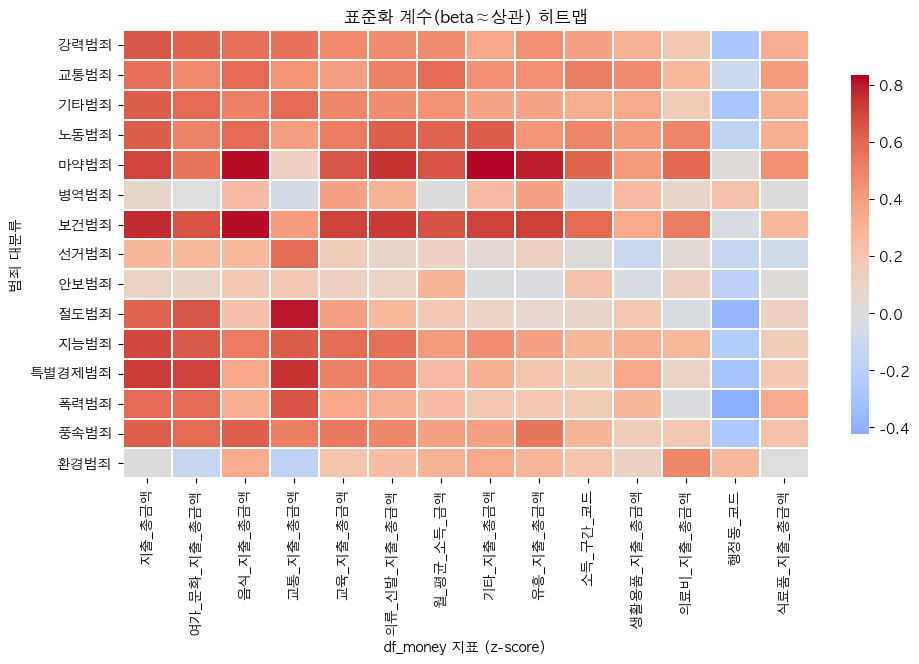

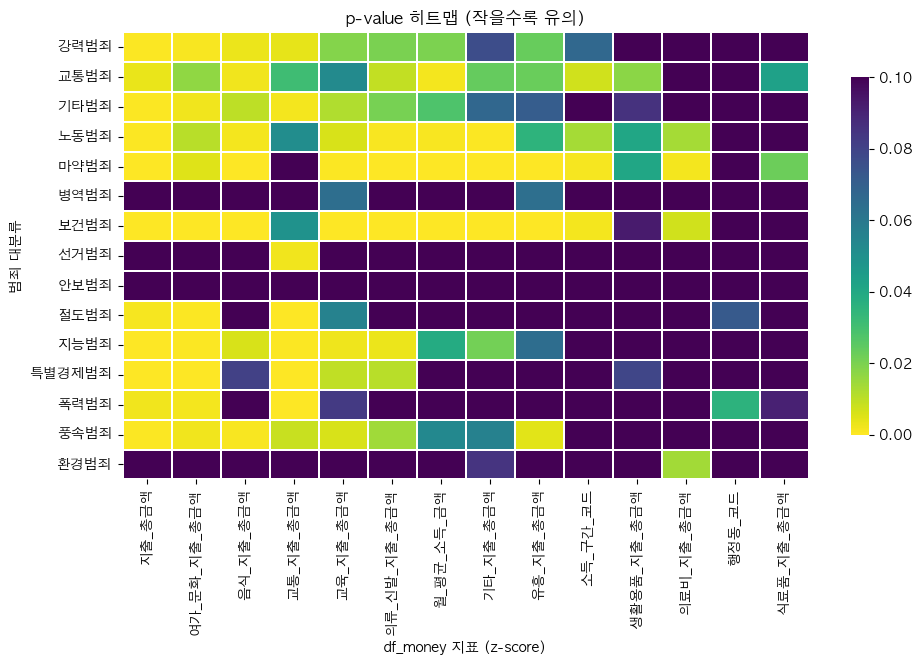

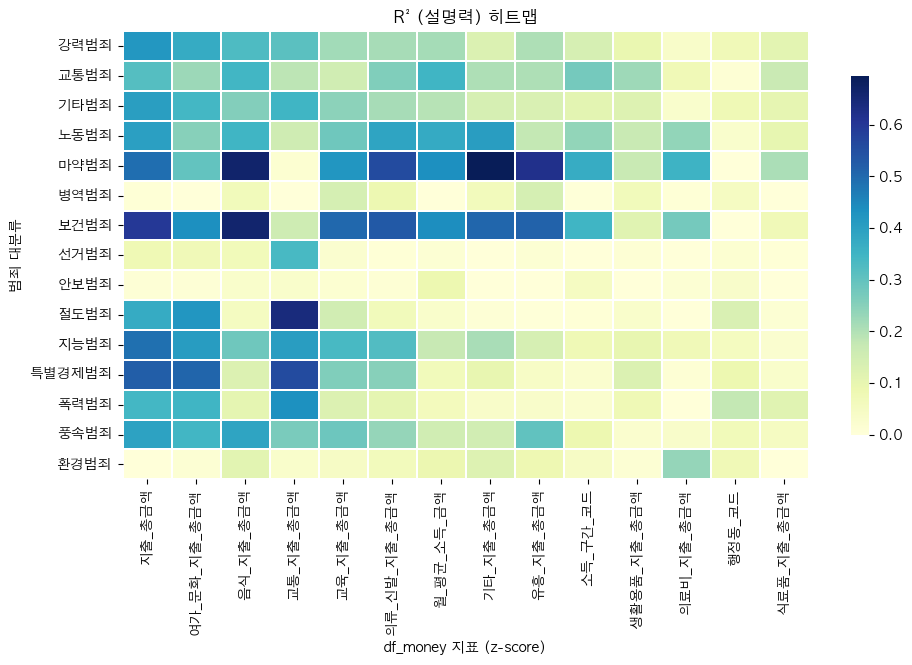

In [96]:
# df vs df_money 칼럼 비교 + 회귀 매트릭스 + 히트맵 (원샷)
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) 칼럼 비교 요약
print('[칼럼 비교 요약]')
df_cols = list(df.columns)
money_cols = list(df_money.columns)
print(f'- df 컬럼 수: {len(df_cols)}')
print(f'- df_money 컬럼 수: {len(money_cols)}')

common_cols = sorted(set(df_cols) & set(money_cols))
df_only = sorted(set(df_cols) - set(money_cols))
money_only = sorted(set(money_cols) - set(df_cols))
print(f'- 공통 컬럼 수: {len(common_cols)} -> {common_cols[:10]}{" ..." if len(common_cols) > 10 else ""}')

# df 내 서울 자치구 컬럼 파악
seoul_cols = [c for c in df_cols if str(c).startswith('서울')]
print(f'- df의 서울 구 컬럼 수: {len(seoul_cols)} -> {seoul_cols[:10]}{" ..." if len(seoul_cols) > 10 else ""}')

# df_money의 자치구 식별 컬럼 추정 (더 엄격)
name_priority = ['자치구','시군구','행정구역','행정구','자치구명','시군구명']
textual_cols = [c for c in df_money.columns if df_money[c].dtype == 'object']
# 1차: 키워드를 포함하는 문자열 컬럼
candidates = [c for c in textual_cols if any(k in str(c) for k in name_priority)]
# 2차: 값에 '구'가 많이 등장하는 문자열 컬럼
if not candidates:
    for c in textual_cols:
        s = df_money[c].astype(str).head(200)
        if (s.str.contains('구').mean() if len(s) else 0) > 0.2:
            candidates.append(c)
# 3차: 비수치 컬럼이 하나뿐이면 그걸 사용
if not candidates:
    if len(textual_cols) == 1:
        candidates = textual_cols

possible_gu_cols = [c for c in name_priority if c in candidates]
# 우선순위 기반 선택, 없으면 첫 후보
if candidates:
    if possible_gu_cols:
        gu_col = possible_gu_cols[0]
    else:
        gu_col = candidates[0]
else:
    # 최후 수단: 컬럼명에 '구'가 포함되지만 숫자인 경우는 제외 (ex: 소득_구간_코드)
    gu_col = None
print(f"- df_money 자치구 추정 컬럼: {gu_col}")

# 돈 데이터 숫자형 칼럼 개요
money_numeric = df_money.select_dtypes(include=['number']).columns.tolist()
print(f'- df_money 숫자형 컬럼 수: {len(money_numeric)} -> {money_numeric[:10]}{" ..." if len(money_numeric) > 10 else ""}')

# df_only / money_only 미리보기 테이블
n = max(len(df_only), len(money_only))
preview = pd.DataFrame({
    'df_only': df_only + [None]*(n - len(df_only)),
    'df_money_only': money_only + [None]*(n - len(money_only))
})
display(preview.head(30))

# 2) 범죄 대분류(소계)별 y와 df_money 지표 x 간 페어와이즈 OLS 회귀
id_cols = ['범죄대분류', '범죄중분류']
if not seoul_cols:
    seoul_cols = [c for c in df.columns if str(c).startswith('서울')]

crime_cat = (
    df[df['범죄중분류'] == '소계']
      .loc[:, id_cols + seoul_cols]
      .copy()
)
# '전체' 제외
crime_cat = crime_cat[crime_cat['범죄대분류'] != '전체']

# 구 이름 표준화
gu_names = [c.replace('서울', '') for c in seoul_cols]

def normalize_gu(x: object) -> str:
    s = str(x)
    s = s.replace('서울특별시', '').replace('서울', '').strip()
    m = re.search(r'([가-힣]+구)', s)
    return m.group(1) if m else s

money = df_money.copy()
if gu_col is None:
    raise ValueError('df_money에서 자치구명을 가진 문자열 컬럼을 찾지 못했습니다. df_money의 문자열 컬럼명을 확인해주세요.')

money['자치구_norm'] = money[gu_col].apply(normalize_gu)
money = money[money['자치구_norm'].isin(gu_names)].copy()

# 숫자형 후보 변환
num_candidates = [c for c in money.columns if c not in [gu_col, '자치구_norm']]
for c in num_candidates:
    money[c] = (money[c].astype(str)
                         .str.replace(',', '', regex=False)
                         .str.replace('%', '', regex=False)
                         .str.replace('−', '-', regex=False)
                         .str.replace(' ', '', regex=False))
    money[c] = pd.to_numeric(money[c], errors='coerce')

# 구별 평균 집계 및 유효 피처 선택
X = money.groupby('자치구_norm')[num_candidates].mean()
valid_cols = [c for c in X.columns if X[c].notna().sum() >= 10 and X[c].std(skipna=True) > 0]
X = X[valid_cols]

# (중요) 표준화: df_money 지표를 자치구 단위로 z-score
if X.shape[1] > 0:
    mu = X.mean(axis=0)
    sigma = X.std(axis=0, ddof=0)
    sigma = sigma.replace(0, np.nan)
    X = (X - mu) / sigma
    X = X.dropna(axis=1, how='any')  # 표준화로 NaN 생긴 컬럼 제거

if X.shape[1] == 0:
    # 숫자형 지표가 모두 결측/상수인 경우 상위 10개 숫자형 칼럼만 선택해 시도
    fallback = money_numeric[:10]
    fallback = [c for c in fallback if c in money.columns]
    X = money.groupby('자치구_norm')[fallback].mean()
    mu = X.mean(axis=0)
    sigma = X.std(axis=0, ddof=0).replace(0, np.nan)
    X = ((X - mu) / sigma).dropna(axis=1, how='any')

if X.shape[1] == 0:
    raise ValueError('df_money에서 사용할 수 있는 (표준화 가능한) 숫자형 지표가 없습니다. 원본 컬럼을 확인해 주세요.')

categories = crime_cat['범죄대분류'].tolist()
metrics = X.columns.tolist()

coef_mat = pd.DataFrame(index=categories, columns=metrics, dtype=float)
pval_mat = pd.DataFrame(index=categories, columns=metrics, dtype=float)
r2_mat   = pd.DataFrame(index=categories, columns=metrics, dtype=float)

for cat in categories:
    y_series = pd.Series(
        crime_cat.loc[crime_cat['범죄대분류'] == cat, seoul_cols].values.ravel(),
        index=gu_names,
        name='y'
    )
    # (중요) y도 자치구 단위 z-score로 표준화 -> slope ~= Pearson r
    y_mu = y_series.mean()
    y_sigma = y_series.std(ddof=0)
    if y_sigma == 0 or np.isnan(y_sigma):
        y_z = y_series * np.nan
    else:
        y_z = (y_series - y_mu) / y_sigma

    df_xy = pd.concat([y_z.rename('y'), X], axis=1).dropna()

    for m in metrics:
        data = df_xy[['y', m]].dropna()
        if len(data) >= 8:
            X_sm = sm.add_constant(data[m])
            model = sm.OLS(data['y'], X_sm).fit()
            coef_mat.loc[cat, m] = model.params.get(m, np.nan)
            pval_mat.loc[cat, m] = model.pvalues.get(m, np.nan)
            r2_mat.loc[cat, m]   = model.rsquared
        else:
            coef_mat.loc[cat, m] = np.nan
            pval_mat.loc[cat, m] = np.nan
            r2_mat.loc[cat, m]   = np.nan

order = coef_mat.abs().mean(axis=0).sort_values(ascending=False).index
coef_mat = coef_mat[order]
pval_mat = pval_mat[order]
r2_mat   = r2_mat[order]

print('\n[회귀 계수 (slope; 표준화된 beta≈상관계수) 매트릭스]')
display(coef_mat.round(3))
print('\n[p-value 매트릭스] (작을수록 유의)')
display(pval_mat.round(4))
print('\n[R^2 매트릭스] (설명력)')
display(r2_mat.round(3))

# 3) 히트맵 시각화

def finite_max(arr, default=None):
    vals = np.asarray(arr).astype(float).ravel()
    vals = vals[np.isfinite(vals)]
    if vals.size == 0:
        return default
    return float(vals.max())

def plot_heatmap(mat, title, cmap='coolwarm', center=None, vmin=None, vmax=None):
    h, w = mat.shape
    plt.figure(figsize=(max(10, 0.6*w), max(6, 0.45*h)))
    sns.heatmap(
        mat,
        cmap=cmap,
        center=center,
        vmin=vmin,
        vmax=vmax,
        annot=False,
        linewidths=0.3,
        linecolor='white',
        cbar_kws={'shrink': 0.8}
    )
    plt.title(title)
    plt.xlabel('df_money 지표 (z-score)')
    plt.ylabel('범죄 대분류')
    plt.tight_layout()
    plt.show()

plot_heatmap(coef_mat, '표준화 계수(beta≈상관) 히트맵', cmap='coolwarm', center=0)

vmax_p = finite_max(pval_mat.values, default=0.1)
vmax_p = min(0.1, vmax_p) if vmax_p is not None else 0.1
plot_heatmap(pval_mat, 'p-value 히트맵 (작을수록 유의)', cmap='viridis_r', vmin=0.0, vmax=vmax_p)

vmax_r2 = finite_max(r2_mat.values, default=1.0)
vmax_r2 = min(1.0, vmax_r2) if vmax_r2 is not None else 1.0
plot_heatmap(r2_mat, 'R² (설명력) 히트맵', cmap='YlGnBu', vmin=0.0, vmax=vmax_r2)
